In [24]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import model_from_json
import utils
from matplotlib import pyplot as plt
from numpy import argmax
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import pandas as pd

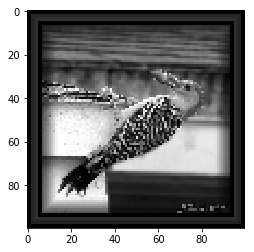

In [25]:
#-------------------load image data for evaluation
import glob

bird_x = utils.load_and_preprocess_images('/home/patriks/Desktop/bird-plane-orange-web-classiffier/datasets/dumped_birds/*.jpg')
plane_x = utils.load_and_preprocess_images('/home/patriks/Desktop/bird-plane-orange-web-classiffier/datasets/airplanes_raw/*.jpg')
orange_x = utils.load_and_preprocess_images('/home/patriks/Desktop/bird-plane-orange-web-classiffier/datasets/oranges_raw/*.jpg')

bird_y = np.empty(bird_x.shape[0])
bird_y.fill(0)
plane_y = np.empty(plane_x.shape[0])
plane_y.fill(1)
orange_y = np.empty(orange_x.shape[0])
orange_y.fill(2)

x = np.concatenate((bird_x, plane_x, orange_x))
y = np.concatenate((bird_y, plane_y, orange_y))

X_train, X_test, Y_train, Y_test = train_test_split(x, y,
                                                test_size=0.30, random_state=42)
utils.showImage(X_test[406], gray = True)
raw_x_test = X_test; # saved for later visualization.

X_train = X_train.reshape(X_train.shape[0], 100, 100, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 100, 1)
#
#
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# print(X_train[0])
#
# Normalize
# Normally datasets values range from 0 to 255. By dividing by max we get values
# between 0 and 1. neato.
X_train /= 255
X_test /= 255

# Convert our label to one-hot encoding
# vectors with the correct class having 1 and the rest having 0
Y_train = np_utils.to_categorical(Y_train, 3)
Y_test = np_utils.to_categorical(Y_test, 3)
#------------------------------------

In [26]:
# load json and create model
json_file = open('BPO100_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("BPO100_model.h5")
print("Loaded model from disk")


Loaded model from disk


In [27]:
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1] * 100))

predictions = loaded_model.predict(X_test)

acc: 83.61%


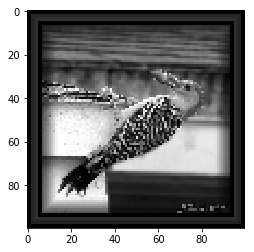

0
The image contains a Bird


In [28]:
result = utils.one_hot_to_categorical(predictions[406])
utils.showImage(raw_x_test[406],gray=True)
print(result)
utils.print_image_class(result)

### Note to future: following is kmeans and pca on the predictions. Didn't really how anything useful

In [29]:

# Create a list of booleans showing if the indices predicted and actual class match.
same = list()
for i in range(Y_test.shape[0]):
#     print (argmax(Y_test[i]) ," : ", argmax(predictions[i]))
#     same[i] = argmax(Y_test[i]) == argmax(predictions[i])
    same.append(argmax(Y_test[i]) == argmax(predictions[i]))
print(argmax(Y_test[5]) ," : ", argmax(predictions[5]))
print (same[5])

2  :  2
True


In [30]:
# errors = pd.DataFrame(X_test.reshape(X_test.shape[0], 100, 100))
X_test = X_test.reshape(X_test.shape[0], 100, 100)


In [31]:
size = X_test.shape[0]


In [32]:
# X_test.reshape(X_test.shape[0], 1000)
X_test = X_test.flatten().reshape(size, 10000)

In [33]:
test_errors = pd.DataFrame(X_test)

In [34]:
test_errors.head(5)
test_errors['correct'] = same
# house_data1.columns.difference(['DealCode'])
# test_errors = test_errors['correct'] ==True
test_errors = test_errors[test_errors.correct != False]


In [35]:
# Now we have a n*n+1 columned dataframe with correct column indicating wether we predicted it correctly. 
# We can ue it to mark the correctly/incorrectly labeled images.
# test_errors.head()
test_errors

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,correct
0,0.298557,0.359827,0.388451,0.367737,0.356031,0.341114,0.283384,0.228616,0.248224,0.304925,...,0.282463,0.381639,0.368447,0.360008,0.320792,0.273800,0.263529,0.266765,0.294463,True
1,0.369522,0.368627,0.384886,0.412337,0.414404,0.411122,0.415533,0.446820,0.458224,0.442663,...,0.623369,0.616141,0.572937,0.626902,0.663647,0.683020,0.659725,0.667012,0.661682,True
3,0.342071,0.388106,0.435208,0.442729,0.434886,0.411486,0.388235,0.364706,0.336125,0.321376,...,0.158298,0.154055,0.153902,0.141816,0.134780,0.132435,0.116918,0.121031,0.116788,True
5,0.471965,0.459373,0.471004,0.460369,0.455933,0.463733,0.448282,0.456125,0.447769,0.439925,...,0.015173,0.015173,0.016514,0.016302,0.015341,0.003408,0.030859,0.002235,0.011251,True
6,0.250980,0.305882,0.235592,0.326557,0.293267,0.269545,0.347996,0.396420,0.384698,0.274024,...,0.418725,0.309451,0.227612,0.509569,0.423361,0.358082,0.721996,0.325984,0.509169,True
7,0.337255,0.411765,0.396078,0.396078,0.396078,0.396078,0.396078,0.396078,0.396078,0.396078,...,0.345098,0.345098,0.345098,0.345098,0.345098,0.352941,0.345098,0.364706,0.325490,True
8,0.807584,0.807584,0.807584,0.812400,0.812400,0.812400,0.816322,0.815149,0.816322,0.820243,...,0.133518,0.132067,0.135988,0.138333,0.130490,0.134090,0.134090,0.130125,0.129275,True
11,0.253835,0.294094,0.361584,0.274239,0.246161,0.250082,0.251169,0.259055,0.245839,0.270584,...,0.734263,0.453722,0.510451,0.179855,0.509914,0.584651,0.103016,0.474318,0.121996,True
13,0.987957,0.984035,0.984800,0.989000,0.984929,0.969561,0.952380,0.960631,0.961290,0.944388,...,0.709377,0.699094,0.706776,0.708569,0.730306,0.737255,0.746314,0.749192,0.752663,True
15,1.000000,1.000000,1.000000,1.000000,0.998827,0.998212,0.405180,0.400008,0.412243,0.420980,...,0.412482,0.991792,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True


In [36]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=2)
test_errors = pca.fit_transform(test_errors)

In [38]:
K = 3
kmeans_model = KMeans(n_clusters=K).fit(test_errors)

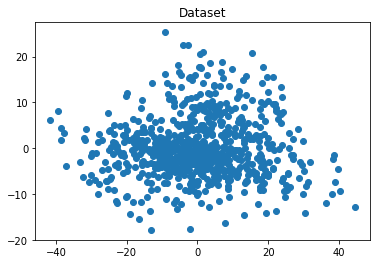

In [39]:
test_errors.shape
test_errors = pd.DataFrame(test_errors)
test_errors.columns
kmeans_model.labels_
plt.plot()
plt.title('Dataset')
plt.scatter(test_errors[0], test_errors[1])
plt.show()

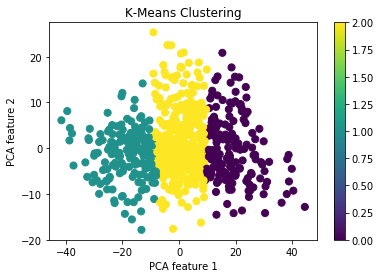

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(test_errors[0],test_errors[1],
                     c=kmeans_model.labels_,s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('PCA feature 1')
ax.set_ylabel('PCA feature 2')
plt.colorbar(scatter)

IndexError: list index out of range

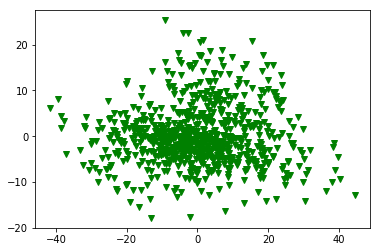

In [41]:
colors = ['b', 'g']
markers = ['o', 'v']
plt.plot()
for i, l in enumerate(kmeans_model.labels_):
    plt.plot(test_errors[0], test_errors[1], color=colors[l], marker=markers[l],ls='None')
    
plt.show()